In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("b_depressed.csv")
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [59]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [60]:
df.dropna(inplace=True)
df.drop(['Survey_id','Ville_id'], axis = 1, inplace = True)

In [61]:
df['Number_children'] = df['Number_children'].apply(lambda x: str(x)+' children')
df['education_level'] = df['education_level'].apply(lambda x: str(x)+' education level')
df['total_members'] = df['total_members'].apply(lambda x: str(x)+' family members')
df.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4 children,10 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3 children,8 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3 children,9 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2 children,10 education level,4 family members,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4 children,10 education level,6 family members,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [62]:
temp = pd.get_dummies(df['Number_children'],drop_first=False)
df = pd.concat([df,temp],axis=1)
df.drop('Number_children',axis=1,inplace=True)

temp = pd.get_dummies(df['education_level'],drop_first=False)
df = pd.concat([df,temp],axis=1)
df.drop('education_level',axis=1,inplace=True)

temp = pd.get_dummies(df['total_members'],drop_first=False)
df = pd.concat([df,temp],axis=1)
df.drop('total_members',axis=1,inplace=True)

In [63]:
df.isnull().sum()

sex                      0
Age                      0
Married                  0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
0 children               0
1 children               0
10 children              0
11 children              0
2 children               0
3 children               0
4 children               0
5 children               0
6 children               0
7 children               0
8 children               0
9 children               0
1 education level        0
10 education level       0
11 education level       0
12 education level       0
13 education level       0
14 education level       0
16 education level       0
1

In [64]:
print('\nEl numero de filas y columnas en el data set: ',df.shape)


El numero de filas y columnas en el data set:  (1409, 60)


In [65]:
df['depressed'].value_counts()

0    1174
1     235
Name: depressed, dtype: int64

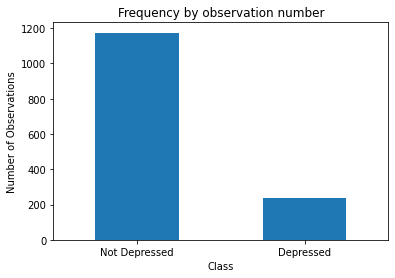

In [66]:
LABELS= ['Not Depressed', 'Depressed']

count_classes = pd.value_counts(df['depressed'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");